# Visualizaciones en Python
Deberás entregar el segundo avance de tu proyecto final. Elegirás uno de los datasets del desafío “Elección de Potenciales Datasets e importe con la librería Pandas”. Posteriormente, crearás un notebook donde cargaran el archivo utilizando funciones de pandas para luego proceder a realizar 3 gráficos diferentes con Matplotlib y 3 con Seaborn. Finalmente, cada gráfico será interpretado con el fin de obtener insights relevantes que permitan dar respuesta a la pregunta problema.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/AdultIncome.csv"

In [3]:
adult_income = pd.read_csv(url)

In [6]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
age_max = adult_income["age"].max()
age_min = adult_income["age"].min()
ages = range(age_min,age_max+1)

capital_mean_gain = []
for i in ages:
    capital_mean_gain.append(adult_income[adult_income["age"]==i]["capital-gain"].mean())
capital_mean_gain_x_ages = np.array(capital_mean_gain)

range(17, 91)


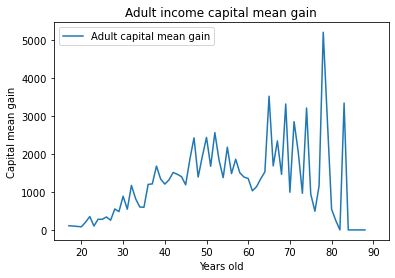

In [39]:
fig, ax = plt.subplots()
ax.plot(ages, capital_mean_gain_x_ages, label='Adult capital mean gain')
ax.set_xlabel('Years old')                  
ax.set_ylabel('Capital mean gain')
ax.set_title('Adult income capital mean gain')
ax.legend() 